In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
data.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
1323,9.1,0.360,0.39,1.8,0.060,21.0,55.0,0.99495,3.18,0.82,11.0,High,7
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,Low,5
1321,5.0,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,High,6
384,7.7,0.510,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,Low,5
1159,10.2,0.410,0.43,2.2,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,Medium,5
1549,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,High,8
930,6.6,0.610,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,Medium,5
763,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,Medium,5
755,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,Medium,6


In [4]:
data.shape

(1599, 13)

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
ord_encoder = OrdinalEncoder(categories = [['Low','Medium','High']])

df1 = ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [8]:
data['Alcohol_content']=df1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


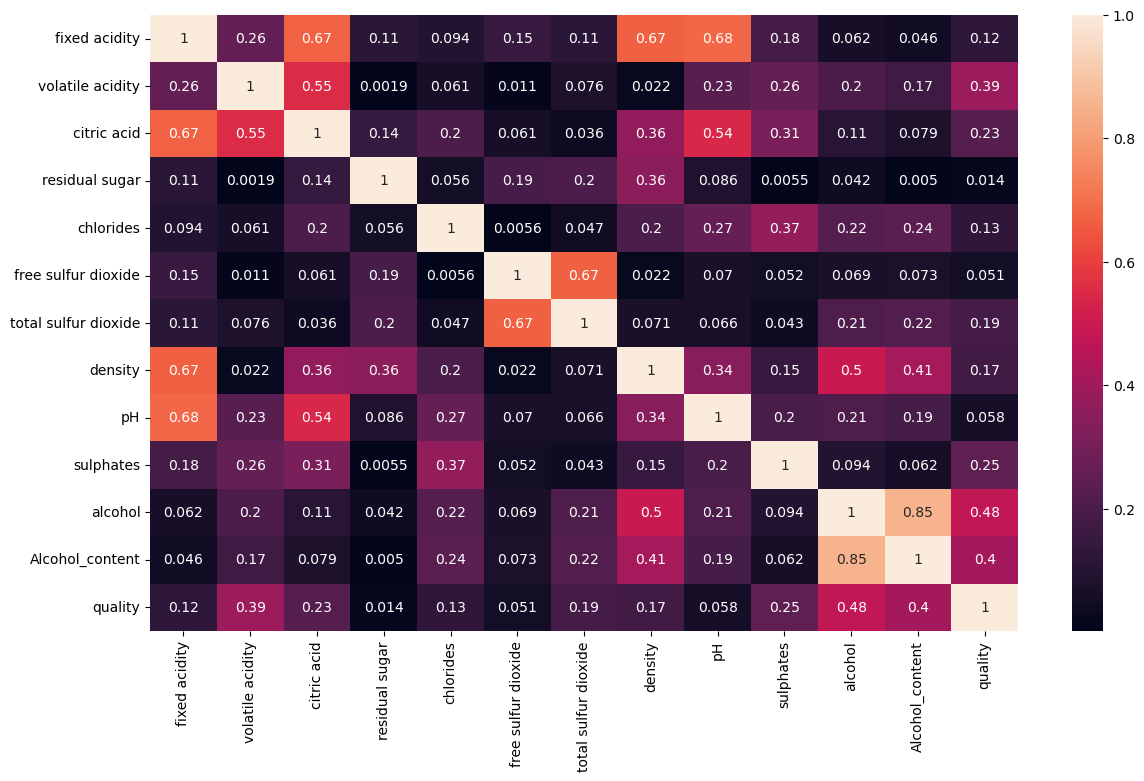

In [9]:
df_corr = data.corr().abs()#This code will get the relationship between one variable and all other variables (Relationship)

plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot = True, annot_kws={'size':10})
plt.show()

In [10]:
#Seems like Alcohol and Alcohol_content have a relationship lets do more testing

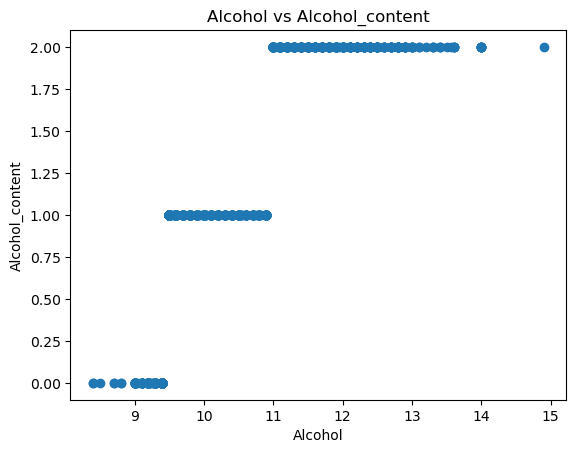

In [11]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

In [12]:
x = data.drop(columns=['quality','Alcohol_content'])
y = data['quality']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=41)

In [14]:
#Write one function and call as many times to check accuracy score of different models

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n=============Train result==========')
        
        print(f'Accuracy score:  {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print('\n=============Test result===========')
        
        print(f'Accuracy score:  {accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n \n Test classification report \n', classification_report(y_test, pred, digits = 2)) #Model confidence/accuracy

In [15]:
#Model Initialization
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
#call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True) #This is for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False) #This is for testing score


=============Train result==========
Accuracy score:  100.00%

=============Test result===========
Accuracy score:  63.00%

 
 Test classification report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.18      0.15        11
           5       0.70      0.71      0.71       157
           6       0.67      0.64      0.65       168
           7       0.53      0.53      0.53        57
           8       0.17      0.25      0.20         4

    accuracy                           0.63       400
   macro avg       0.37      0.38      0.37       400
weighted avg       0.64      0.63      0.63       400



In [18]:
#Prediction for confusion matrix
y_pred = clf.predict(x_test)

#Creation confusion matrix
confusion_matrix(y_test,y_pred)

array([[  0,   1,   2,   0,   0,   0],
       [  1,   2,   6,   2,   0,   0],
       [  2,   5, 112,  33,   5,   0],
       [  0,   5,  32, 107,  21,   3],
       [  0,   2,   7,  16,  30,   2],
       [  0,   0,   1,   1,   1,   1]], dtype=int64)

In [20]:
#Convert into Dataframe to understand this better
pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'], index = ['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,0,1,2,0,0,0
Q4,1,2,6,2,0,0
Q5,2,5,112,33,5,0
Q6,0,5,32,107,21,3
Q7,0,2,7,16,30,2
Q8,0,0,1,1,1,1


In [22]:
feature_name = list(x.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [2]:
!pip install sklearn
!pip install pydotplus
!pip install graphviz
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"library\bin\graphviz

SyntaxError: unterminated string literal (detected at line 5) (3494728627.py, line 5)

In [4]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

#create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names=feature_name, rounded = True, filled = True)

#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("MyTree.png")
#show graph
Image(graph.create_png())

ModuleNotFoundError: No module named 'graphviz'